<a href="https://colab.research.google.com/github/LatiefDataVisionary/deep-learning-college-task/blob/main/tasks/src/MK_Deep_Learning_W5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

train_dir = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Train'
test_dir = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Test'

# List files in the training directory
train_files = os.listdir(train_dir)
print("Files in Data Train directory:")
for file in train_files[:10]: # Print first 10 files as an example
    print(file)

print("\n") # Add a newline for better readability

# List files in the testing directory
test_files = os.listdir(test_dir)
print("Files in Data Test directory:")
for file in test_files[:10]: # Print first 10 files as an example
    print(file)

Files in Data Train directory:
5231811025_Novera_34.jpg
5231811025_Novera_38.jpg
5231811025_Novera_39.jpg
5231811025_Novera_31.jpg
5231811025_Novera_32.jpg
5231811025_Novera_33.jpg
5231811026_ULFAH NAFIAH_01.jpg
5231811025_Novera_40.jpg
5231811025_Novera_37.jpg
5231811027_Naufal_01.jpg


Files in Data Test directory:
5221911025-Anggun-01.jpg
5231811002_MichaelAndrewDeHaan_01.jpg
5221911025-Anggun-40.jpg
5221911012_Debora_01.jpg
5221911012_Debora_09.jpg
5221911012_Debora_40.jpg
5221911012_Debora_39.jpg
5221911025-Anggun-39.jpg
5221911012_Debora_25.jpg
5221911025-Anggun-09.jpg


## **Section 0: Initial Setup (Pengaturan Awal)**

**Penjelasan:** Bagian ini bertujuan untuk melakukan instalasi library Python yang mungkin belum ada di lingkungan Google Colab secara default, serta me-mount Google Drive agar notebook dapat mengakses dataset yang tersimpan di dalamnya.

### **0.1. Install Libraries (Instalasi Library)**

**Penjelasan:** Menginstal library tambahan yang mungkin diperlukan, seperti versi spesifik dari tensorflow atau library lain yang tidak termasuk dalam instalasi Colab dasar. Saat ini, library utama seperti TensorFlow dan Keras sudah terinstal, namun baris ini dapat ditambahkan jika ada kebutuhan library lain di masa depan.

In [3]:
# Tidak ada instalasi library tambahan yang spesifik diperlukan untuk langkah dasar ini,
# karena library utama seperti tensorflow sudah tersedia di Colab.
# Jika ada library lain yang dibutuhkan, tambahkan baris berikut:
# !pip install nama_library

### **0.2. Mount Google Drive (Menghubungkan Google Drive)**

**Penjelasan:** Menghubungkan notebook ini dengan akun Google Drive Anda. Ini diperlukan agar notebook dapat membaca file dataset gambar yang telah Anda simpan di Google Drive. Setelah menjalankan sel ini, ikuti instruksi otorisasi yang muncul.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Section 1: Import Libraries and Environment Setup (Impor Library dan Pengaturan Lingkungan)**

**Penjelasan:** Di sini kita akan mengimpor semua modul dan library yang dibutuhkan untuk keseluruhan proyek serta mendefinisikan variabel-variabel global seperti path direktori, ukuran gambar, dan parameter training.

### **1.1. Import Core Libraries (Impor Library Utama)**

**Penjelasan:** Mengimpor library utama seperti tensorflow, keras, numpy, matplotlib.pyplot, os, dan seaborn yang akan digunakan sepanjang proyek ini.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

### **1.2. Define Configurations (Definisi Konfigurasi)**

**Penjelasan:** Mendefinisikan variabel-variabel konfigurasi yang akan digunakan di seluruh notebook, termasuk path ke dataset, ukuran gambar yang akan digunakan, ukuran batch untuk training, jumlah epoch, dan jumlah kelas (mahasiswa).

In [6]:
# Define Directory Paths (Definisi Path Direktori)
TRAIN_DIR = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Train'
TEST_DIR = '/content/drive/MyDrive/Dataset/Dataset Sistem Presensi Wajah V1.0/Data Test'

# Define Image Parameters (Definisi Parameter Gambar)
IMG_HEIGHT = 150
IMG_WIDTH = 150
CHANNELS = 3 # RGB color images

# Define Training Parameters (Definisi Parameter Pelatihan)
BATCH_SIZE = 32
EPOCHS = 100 # Will be controlled by Early Stopping
NUM_CLASSES = 57 # Total number of unique students

## **Section 2: Data Loading and Inspection (Pemuatan dan Inspeksi Data)**

**Penjelasan:** Langkah ini bertujuan untuk memuat dataset, memeriksa strukturnya, dan menampilkan beberapa sampel gambar untuk memastikan data ter-load dengan benar.

### **2.1. Load Dataset Paths (Memuat Path Dataset)**

**Penjelasan:** Kode untuk menghitung jumlah total gambar training dan testing.

In [7]:
# Count the number of files in each directory
train_image_count = sum([len(files) for r, d, files in os.walk(TRAIN_DIR)])
test_image_count = sum([len(files) for r, d, files in os.walk(TEST_DIR)])

print(f"Jumlah total gambar di Data Train: {train_image_count}")
print(f"Jumlah total gambar di Data Test: {test_image_count}")

# Get the class names (student names) from the directory names
class_names = sorted(os.listdir(TRAIN_DIR))
print(f"\nJumlah kelas (mahasiswa) terdeteksi: {len(class_names)}")
print(f"Nama kelas (mahasiswa) contoh: {class_names[:10]}...") # Display first 10 class names

Jumlah total gambar di Data Train: 1696
Jumlah total gambar di Data Test: 424

Jumlah kelas (mahasiswa) terdeteksi: 1696
Nama kelas (mahasiswa) contoh: ['5221911012_Debora_03.jpg', '5221911012_Debora_04.jpg', '5221911012_Debora_05.jpg', '5221911012_Debora_06.jpg', '5221911012_Debora_07.jpg', '5221911012_Debora_08.jpg', '5221911012_Debora_11.jpg', '5221911012_Debora_12.jpg', '5221911012_Debora_13.jpg', '5221911012_Debora_14.jpg']...


### **2.2. Inspect Class Distribution (Inspeksi Distribusi Kelas)**

**Penjelasan:** Visualisasikan jumlah gambar per kelas untuk memastikan dataset seimbang.

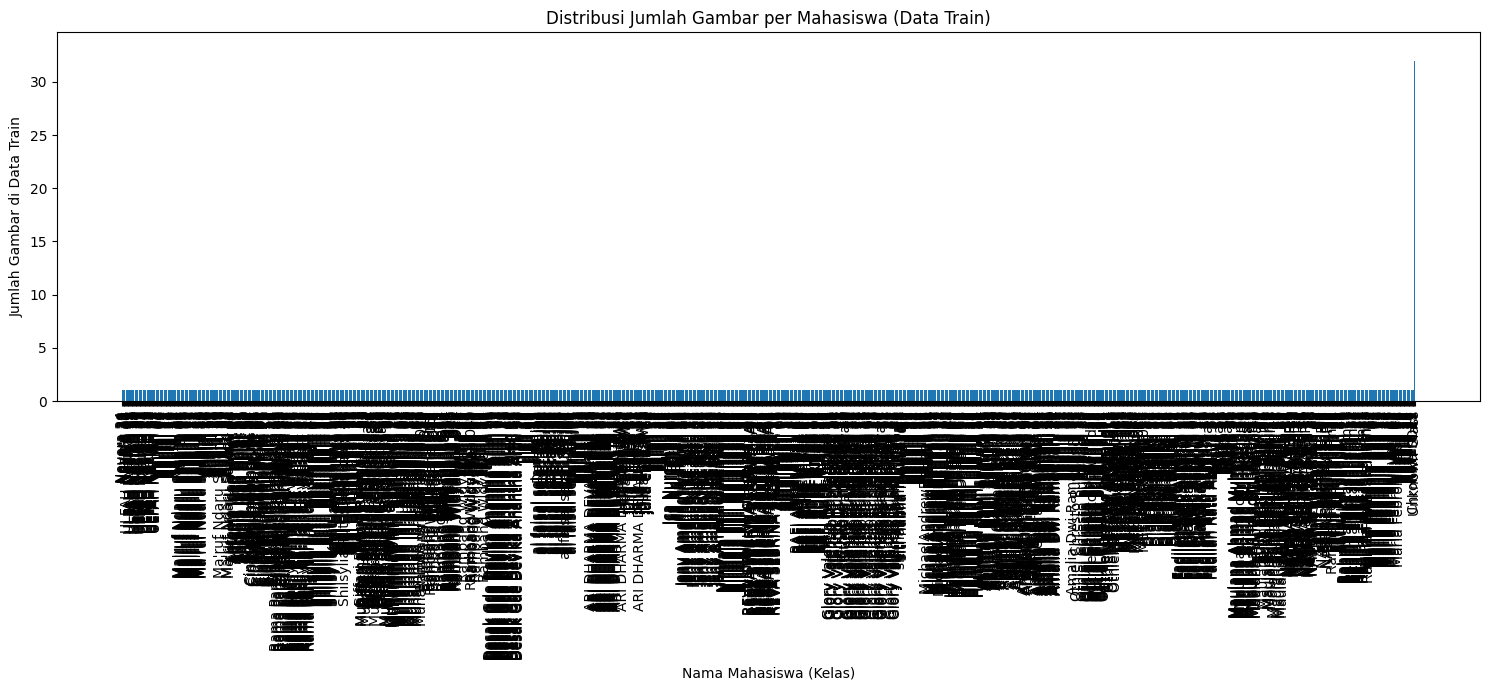

In [11]:
# Count images per class by extracting class name from filename
train_class_counts = {}
for filename in os.listdir(TRAIN_DIR):
    if filename.endswith('.jpg'): # Process only image files
        # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
        class_name_parts = filename.split('_')
        if len(class_name_parts) > 1:
            # Assuming the second part is the name
            class_name = class_name_parts[1]
            # Handle potential extra parts or different naming conventions
            if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                 class_name = class_name # Keep only the name part if structure is consistent
            elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                 class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0] # Handle names with spaces like "Nama Belakang"
        else:
            class_name = "Unknown Class" # Fallback if filename format is unexpected

        if class_name in train_class_counts:
            train_class_counts[class_name] += 1
        else:
            train_class_counts[class_name] = 1

# Sort classes by count for better visualization
sorted_class_counts = dict(sorted(train_class_counts.items(), key=lambda item: item[1]))

# Plot class distribution
plt.figure(figsize=(15, 7))
plt.bar(sorted_class_counts.keys(), sorted_class_counts.values())
plt.xticks(rotation=90)
plt.xlabel("Nama Mahasiswa (Kelas)")
plt.ylabel("Jumlah Gambar di Data Train")
plt.title("Distribusi Jumlah Gambar per Mahasiswa (Data Train)")
plt.tight_layout()
plt.show()

In [12]:
# Check if all class counts are the same
if len(train_class_counts) > 0:
    first_count = list(train_class_counts.values())[0]
    all_counts_same = all(count == first_count for count in train_class_counts.values())

    if all_counts_same:
        print("\nSemua mahasiswa memiliki jumlah gambar yang sama di Data Train.")
    else:
        print("\nJumlah gambar per mahasiswa di Data Train bervariasi.")
else:
    print("\nTidak ada data kelas yang ditemukan untuk diperiksa.")


Jumlah gambar per mahasiswa di Data Train bervariasi.


### **2.3. Visualize Sample Images (Visualisasi Sampel Gambar)**

**Penjelasan:** Tampilkan beberapa gambar acak dari dataset training beserta labelnya untuk melihat variasi pose, ekspresi, dan pencahayaan yang ada.

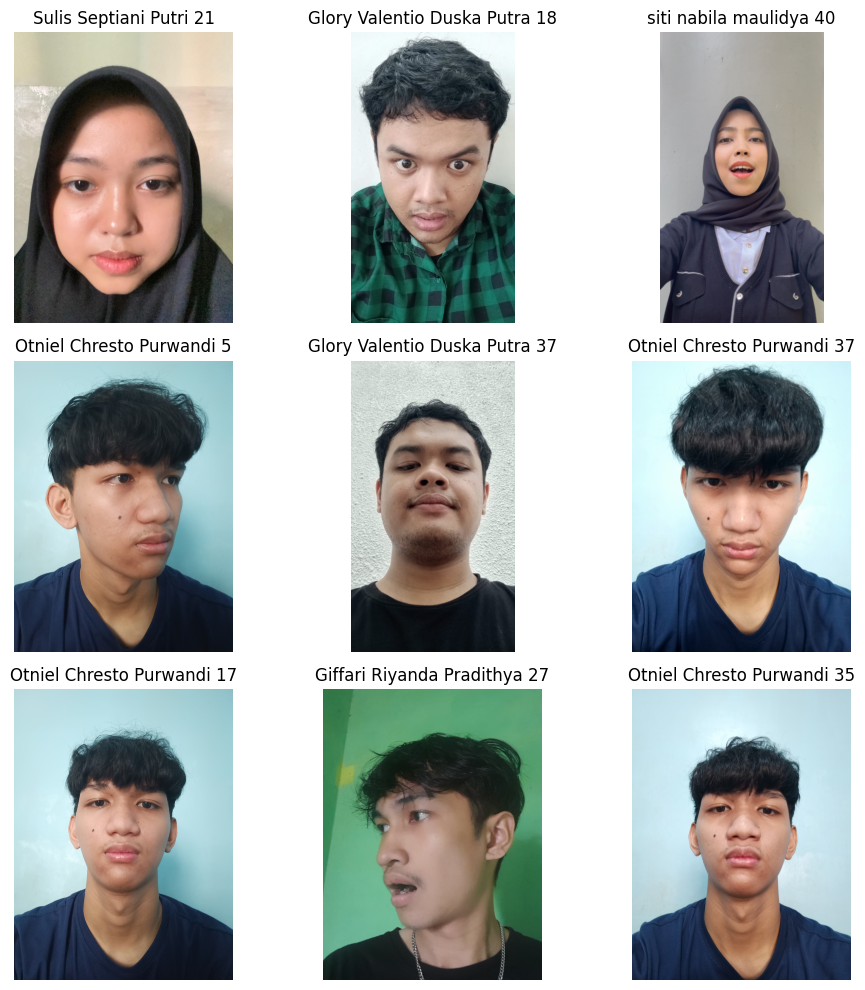

In [10]:
plt.figure(figsize=(10, 10))
# Get all image files from the training directory
all_train_images = [os.path.join(TRAIN_DIR, f) for f in os.listdir(TRAIN_DIR) if f.endswith('.jpg')]

# Check if there are enough images
if len(all_train_images) < 9:
    print(f"Tidak cukup gambar ({len(all_train_images)}) di direktori training untuk menampilkan 9 sampel.")
else:
    # Select 9 random images
    sample_images_paths = np.random.choice(all_train_images, size=9, replace=False)

    for i, img_path in enumerate(sample_images_paths):
        plt.subplot(3, 3, i + 1)
        img = plt.imread(img_path)
        plt.imshow(img)
        # Extract class name from filename (assuming format like ID_Nama_Number.jpg)
        filename = os.path.basename(img_path)
        class_name_parts = filename.split('_')
        if len(class_name_parts) > 1:
            # Assuming the second part is the name
            class_name = class_name_parts[1]
            # Handle potential extra parts or different naming conventions
            if len(class_name_parts) > 2 and class_name_parts[2].isdigit():
                 class_name = class_name # Keep only the name part if structure is consistent
            elif len(class_name_parts) > 2 and not class_name_parts[2].isdigit():
                 class_name = class_name_parts[1] + " " + class_name_parts[2].split('.')[0] # Handle names with spaces like "Nama Belakang"
        else:
            class_name = "Unknown Class" # Fallback if filename format is unexpected

        plt.title(class_name)
        plt.axis("off")

    plt.tight_layout()
    plt.show()